**Day - 1**

In [ ]:
import numpy as np
import torch
import cv2
import matplotlib.pyplot as plt
import pandas as pd
import sklearn

In [ ]:
!nvidia-smi

Sun Aug 27 17:50:39 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   43C    P8     9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
tensor1 = torch.tensor(7)
tensor2 = torch.tensor([1,2])
tensor3 = torch.tensor([[1,2]])
tensor4 = torch.tensor([[4,5],[6,7]])
tensor5 = torch.tensor([[[1,2],[3,4]]])

print(tensor1.ndim,tensor2.ndim,tensor3.ndim,tensor4.ndim,tensor5.ndim)
print(tensor1.shape,tensor2.shape,tensor3.shape,tensor4.shape,tensor5.shape)

0 1 2 2 3
torch.Size([]) torch.Size([2]) torch.Size([1, 2]) torch.Size([2, 2]) torch.Size([1, 2, 2])


In [ ]:
random_tensor = torch.rand((1,3,3))
print(random_tensor.ndim, random_tensor.shape)
print(random_tensor)

3 torch.Size([1, 3, 3])
tensor([[[0.6487, 0.9613, 0.7772],
         [0.9857, 0.9756, 0.8242],
         [0.6960, 0.5135, 0.3615]]])


In [ ]:
zeros = torch.zeros(3,3)
print(zeros.ndim, zeros.shape, zeros.dtype, zeros.device)
print(zeros)

ones = torch.ones(3,3)
print(ones.ndim, ones.shape, ones.dtype, ones.device, ones.requires_grad)
print(ones)

2 torch.Size([3, 3]) torch.float32 cpu
tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])
2 torch.Size([3, 3]) torch.float32 cpu False
tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])


In [ ]:
tensor_range = torch.range(1,5,0.1)
tensor_arange = torch.arange(2,6,0.5)
print(tensor_range.ndim, tensor_range.shape)
print(tensor_range,"\n")
print(tensor_arange.ndim, tensor_arange.shape)
print(tensor_arange)

1 torch.Size([41])
tensor([1.0000, 1.1000, 1.2000, 1.3000, 1.4000, 1.5000, 1.6000, 1.7000, 1.8000,
        1.9000, 2.0000, 2.1000, 2.2000, 2.3000, 2.4000, 2.5000, 2.6000, 2.7000,
        2.8000, 2.9000, 3.0000, 3.1000, 3.2000, 3.3000, 3.4000, 3.5000, 3.6000,
        3.7000, 3.8000, 3.9000, 4.0000, 4.1000, 4.2000, 4.3000, 4.4000, 4.5000,
        4.6000, 4.7000, 4.8000, 4.9000, 5.0000]) 

1 torch.Size([8])
tensor([2.0000, 2.5000, 3.0000, 3.5000, 4.0000, 4.5000, 5.0000, 5.5000])


<ipython-input-6-5d044ec82c3b>:1: UserWarning: torch.range is deprecated and will be removed in a future release because its behavior is inconsistent with Python's range builtin. Instead, use torch.arange, which produces values in [start, end).
  tensor_range = torch.range(1,5,0.1)


In [ ]:
tens_wo_shape = torch.zeros_like(tensor_range)
tens_wo_shape_arange = torch.ones_like(tensor_arange)
print(tensor_range.shape, tens_wo_shape.shape,"\n")
print(tensor_arange.shape, tens_wo_shape_arange.shape)

torch.Size([41]) torch.Size([41]) 

torch.Size([8]) torch.Size([8])


In [ ]:
print(f"Tensor 1 datatype is: {tensor1.dtype}")
tensor1 = tensor1.type(torch.int8)
print(f"Dtype after change is: {tensor1.dtype}")

Tensor 1 datatype is: torch.int64
Dtype after change is: torch.int8


In [ ]:
print(torch.max(tensor1))
print(torch.min(tensor1))
print(torch.mean(tensor_range))
print(torch.sum(tensor1))

tensor(7, dtype=torch.int8)
tensor(7, dtype=torch.int8)
tensor(3.)
tensor(7)


In [ ]:
print(f"Tensor range is on device: {tensor_range.device}\nAnd the type is: {type(tensor_range)}")
print(f"Now the device is: {tensor_range.to('cuda').device}")
print(f"Putting it back on cpu: {tensor_range.cpu().device}")
print(f"Converting to a numpy ndarray: {type(tensor_range.numpy())}")

Tensor range is on device: cpu
And the type is: <class 'torch.Tensor'>
Now the device is: cuda:0
Putting it back on cpu: cpu
Converting to a numpy ndarray: <class 'numpy.ndarray'>


**Day-2**

In [ ]:
import torch
import numpy as np
import pandas as pd
matmul1 = torch.ones((3,2))
matmul2 = torch.rand((3,2))

In [ ]:
print(f"When we try to multiply incompatible shapes: {matmul1 @ matmul2}")

RuntimeError: ignored

In [ ]:
print(f"When we multiply compatible shapes: {matmul1 @ matmul2.T}")

When we multiply compatible shapes: tensor([[0.5818, 0.8149, 1.1182],
        [0.5818, 0.8149, 1.1182],
        [0.5818, 0.8149, 1.1182]])


In [ ]:
random1 = torch.arange(0,100,10).type(torch.float32)
random2 = torch.arange(1,100,11).type(torch.float32)

print("For the first tensor:\n",random1.shape,random1.dtype,random1.device,random1.requires_grad)
print(f"Max: {torch.max(random1)}\nMin: {torch.min(random1)}\nMean: {torch.mean(random1)}\nSum: {torch.sum(random1)}")

print("Properties of second tensor:\n",random2.shape,random2.dtype,random2.device,random2.requires_grad)
print(f"Max: {torch.max(random2)}\nMin: {torch.min(random2)}\nMean: {torch.mean(random2)}\nSum: {torch.sum(random2)}")

For the first tensor:
 torch.Size([10]) torch.float32 cpu False
Max: 90.0
Min: 0.0
Mean: 45.0
Sum: 450.0
Properties of second tensor:
 torch.Size([9]) torch.float32 cpu False
Max: 89.0
Min: 1.0
Mean: 45.0
Sum: 405.0


In [ ]:
print(f"First tensor argmax: {torch.argmax(random1)}\nFirst tensor argmin {torch.argmin(random1)}")
print(f"Second tensor argmax: {torch.argmax(random2)}\nSecond tensor argmin: {torch.argmin(random2)}")

First tensor argmax: 9
First tensor argmin 0
Second tensor argmax: 8
Second tensor argmin: 0


In [ ]:
random3 = torch.rand(3,4).type(torch.float32)
print(random3.shape,random3.ndim)
random3_changed = random3.resize(2,6)
print(random3_changed.shape, random3.ndim)

torch.Size([3, 4]) 2
torch.Size([2, 6]) 2


/usr/local/lib/python3.10/dist-packages/torch/_tensor.py:775: UserWarning: non-inplace resize is deprecated
  warnings.warn("non-inplace resize is deprecated")


In [ ]:
print(f"Using view: {random3_changed.view(3,4)}")

Using view: tensor([[0.8487, 0.5354, 0.9941, 0.3809],
        [0.9362, 0.4601, 0.9022, 0.8033],
        [0.6131, 0.8383, 0.6299, 0.0833]])


In [ ]:
random4 = torch.rand((1,4))
stacked_vert = torch.stack([random4,random4],dim=1)
print(f"Stacked vertically: {stacked_vert}\ndim: {stacked_vert.ndim}\nshape: {stacked_vert.shape}")

stacked_hori = torch.stack([random4,random4],dim=0)
print(f"Stacked vertically: {stacked_hori}\ndim: {stacked_hori.ndim}\nshape: {stacked_hori.shape}")

Stacked vertically: tensor([[[0.4505, 0.2481, 0.4784, 0.2379],
         [0.4505, 0.2481, 0.4784, 0.2379]]])
dim: 3
shape: torch.Size([1, 2, 4])
Stacked vertically: tensor([[[0.4505, 0.2481, 0.4784, 0.2379]],

        [[0.4505, 0.2481, 0.4784, 0.2379]]])
dim: 3
shape: torch.Size([2, 1, 4])


In [ ]:
print(f"Squeezing stacked verticaly: {stacked_vert.squeeze().shape}")
print(f"Unsqueezing stacked horizontally: {stacked_hori.unsqueeze(dim=1).shape}")

Squeezing stacked verticaly: torch.Size([2, 4])
Unsqueezing stacked horizontally: torch.Size([2, 1, 1, 4])


In [ ]:
print(f"Original: {stacked_hori.shape}\nTensor: {stacked_hori}")
permuted = stacked_hori.permute(0,2,1)
print(f"Permuted: {permuted.shape}\nPermuted tensor: {permuted}")
print(f"Original: {stacked_hori}")

Original: torch.Size([2, 1, 4])
Tensor: tensor([[[0.4505, 0.2481, 0.4784, 0.2379]],

        [[0.4505, 0.2481, 0.4784, 0.2379]]])
Permuted: torch.Size([2, 4, 1])
Permuted tensor: tensor([[[0.4505],
         [0.2481],
         [0.4784],
         [0.2379]],

        [[0.4505],
         [0.2481],
         [0.4784],
         [0.2379]]])
Original: tensor([[[0.4505, 0.2481, 0.4784, 0.2379]],

        [[0.4505, 0.2481, 0.4784, 0.2379]]])


In [ ]:
np_array = np.arange(1,100,1)
print(type(np_array))
tens = torch.from_numpy(np_array).type(torch.float32)
print(type(tens))
print(tens.device)
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(tens.to(device).device)
print(f"Dtype of tensor: {tens.dtype}")

<class 'numpy.ndarray'>
<class 'torch.Tensor'>
cpu
cuda:0
Dtype of tensor: torch.float32


In [ ]:
import torch
import torch.nn as nn
torch.manual_seed(42)
weights = 0.7
bias = 0.3
X=torch.arange(0,1,0.02).unsqueeze(dim=1)
y = weights*X+bias
print(X.shape, X.dtype, X.device)
print(X)

torch.Size([50, 1]) torch.float32 cpu
tensor([[0.0000],
        [0.0200],
        [0.0400],
        [0.0600],
        [0.0800],
        [0.1000],
        [0.1200],
        [0.1400],
        [0.1600],
        [0.1800],
        [0.2000],
        [0.2200],
        [0.2400],
        [0.2600],
        [0.2800],
        [0.3000],
        [0.3200],
        [0.3400],
        [0.3600],
        [0.3800],
        [0.4000],
        [0.4200],
        [0.4400],
        [0.4600],
        [0.4800],
        [0.5000],
        [0.5200],
        [0.5400],
        [0.5600],
        [0.5800],
        [0.6000],
        [0.6200],
        [0.6400],
        [0.6600],
        [0.6800],
        [0.7000],
        [0.7200],
        [0.7400],
        [0.7600],
        [0.7800],
        [0.8000],
        [0.8200],
        [0.8400],
        [0.8600],
        [0.8800],
        [0.9000],
        [0.9200],
        [0.9400],
        [0.9600],
        [0.9800]])


In [ ]:
train_x = X[:int(0.8*len(X)),0]
train_y = y[:int(0.8*len(X)),0]

val_x = X[int(0.8*len(X)):50,0]
val_y = y[int(0.8*len(X)):50,0]
print(train_x, '\n', val_x)
print(len(train_x),len(train_y), '\n', len(val_x),len(val_y))

tensor([0.0000, 0.0200, 0.0400, 0.0600, 0.0800, 0.1000, 0.1200, 0.1400, 0.1600,
        0.1800, 0.2000, 0.2200, 0.2400, 0.2600, 0.2800, 0.3000, 0.3200, 0.3400,
        0.3600, 0.3800, 0.4000, 0.4200, 0.4400, 0.4600, 0.4800, 0.5000, 0.5200,
        0.5400, 0.5600, 0.5800, 0.6000, 0.6200, 0.6400, 0.6600, 0.6800, 0.7000,
        0.7200, 0.7400, 0.7600, 0.7800]) 
 tensor([0.8000, 0.8200, 0.8400, 0.8600, 0.8800, 0.9000, 0.9200, 0.9400, 0.9600,
        0.9800])
40 40 
 10 10


In [ ]:
class model(nn.Module):
  def __init__(self):
    super(model,self).__init__()
    self.weights = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))
    self.bias = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))
    # self.linear1 = nn.Linear(inp, hidden1)

  def forward(self,x:torch.Tensor) -> torch.Tensor:
    z = self.weights*x+self.bias
    return z

In [ ]:
linear_regressor = model()

**Day-3**

In [ ]:
layers = list(linear_regressor.children())
print(layers)

[]


In [ ]:
from tqdm.auto import tqdm
import torch
import matplotlib.pyplot as plt
import torch.nn as nn
import numpy as np
import pandas as pd
device = 'cuda:0' if torch.cuda.is_available() else 'cpu'

def train_loop(model,train_x,train_y,n_epochs, opt,criteria):
  loss_train=[]
  loss_val=[]
  for epoch in tqdm(range(n_epochs)):
    model.train()
    opt.zero_grad()
    yhat = model(train_x)
    l = criteria(yhat,train_y)
    l.backward()
    opt.step()
    loss_train.append(l.detach().numpy().item())

    model.eval()
    with torch.inference_mode():
      y_pred = model(val_x)
      l_val = criteria(y_pred,val_y)
      loss_val.append(l_val.detach().numpy().item())
      # acc_sample = (y_pred==y).sum().item()/len(val_x)
      # acc.append(acc_sample)
  return {'training loss':loss_train, 'validation loss':loss_val}

In [ ]:
opt = torch.optim.SGD(linear_regressor.parameters(), lr=0.001)
criteria = nn.L1Loss()
train_loop(linear_regressor, train_x, train_y, 1000, opt, criteria)

  0%|          | 0/1000 [00:00<?, ?it/s]

{'training loss': [0.009368782863020897,
  0.00933497678488493,
  0.009300263598561287,
  0.009266075678169727,
  0.00923173688352108,
  0.009197162464261055,
  0.009163210168480873,
  0.009128306061029434,
  0.009094642475247383,
  0.009059777483344078,
  0.009025735780596733,
  0.008991257287561893,
  0.008956830017268658,
  0.00892273336648941,
  0.00888793170452118,
  0.008854206651449203,
  0.008819302543997765,
  0.008785403333604336,
  0.008750781416893005,
  0.008716483600437641,
  0.008682256564497948,
  0.008647588081657887,
  0.008613725192844868,
  0.008578828535974026,
  0.00854505691677332,
  0.008510304614901543,
  0.008476154878735542,
  0.008441777899861336,
  0.008407248184084892,
  0.008373253978788853,
  0.00833834894001484,
  0.008304724469780922,
  0.00826982595026493,
  0.008235814049839973,
  0.008201301097869873,
  0.008166909217834473,
  0.008132776245474815,
  0.008098003454506397,
  0.008064254187047482,
  0.00802934356033802,
  0.007995473220944405,
  0.007

In [ ]:
print(f"original weight and bias are: {weights},{bias}\nAfter training model parameters are: {linear_regressor.state_dict()}")

original weight and bias are: 0.7,0.3
After training model parameters are: OrderedDict([('weights', tensor([0.6994])), ('bias', tensor([0.2999]))])


In [ ]:
def plot_predictions(train_data,train_labels,test_data,test_labels,predictions):
  plt.figure(figsize=(10,10))
  plt.scatter(train_data,train_labels,c='b',s=4,label='Training data')
  plt.scatter(test_data,test_labels,c='g',s=4,label='Testing data')
  if predictions is not None:
    plt.scatter(test_data,predictions,c='r',s=4,label='Predictions')
  plt.legend(prop={"size":14})

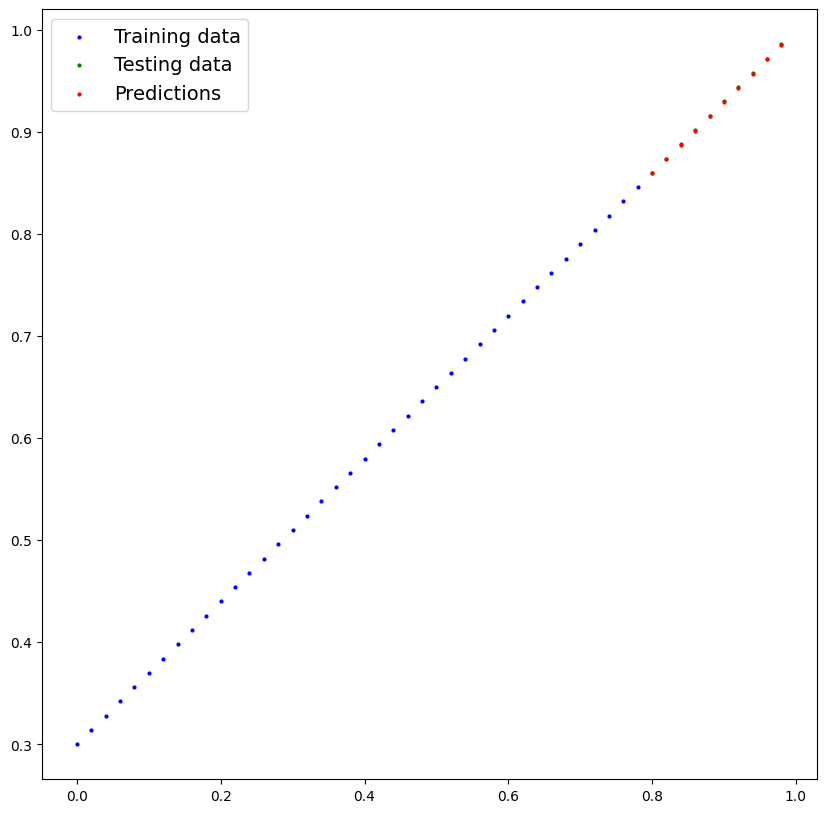

In [ ]:
predictions = linear_regressor(val_x)
plot_predictions(train_x,train_y,val_x,val_y,predictions.detach().numpy())

In [ ]:
print(linear_regressor.state_dict())
torch.save(linear_regressor.state_dict(),'model.pt')

OrderedDict([('weights', tensor([0.6994])), ('bias', tensor([0.2999]))])


In [ ]:
model_0 = model()
model_0.load_state_dict(torch.load('model.pt'))
print(model_0.state_dict())

OrderedDict([('weights', tensor([0.6994])), ('bias', tensor([0.2999]))])


**Day - 4**

In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms
import torchvision.datasets as dsets
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn.datasets import make_circles
device = 'cuda:0' if torch.cuda.is_available() else 'cpu'
torch.manual_seed(42)

n_samples=1000
x,y =  make_circles(n_samples,random_state=42,noise=0.05)
print(len(x),len(y))
print(x[5:])

1000 1000
[[-0.46988549  0.70803745]
 [-0.01604538  0.80562331]
 [ 0.75962295  0.15952616]
 ...
 [-0.12823057 -0.82613318]
 [ 0.66090453 -0.79319015]
 [ 0.27841491  0.96735953]]


In [ ]:
data = pd.DataFrame({"X1":x[:,0],"X2":x[:,1],"Y":y})
data.head(5)

,X1,X2,Y
0,0.742207,0.246686,1
1,-0.734032,0.168692,1
2,-0.829859,0.221959,1
3,-0.429136,0.672230,1
4,0.445602,-0.894936,0


<ipython-input-17-4aca0cfd2607>:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(x=x[:,0],


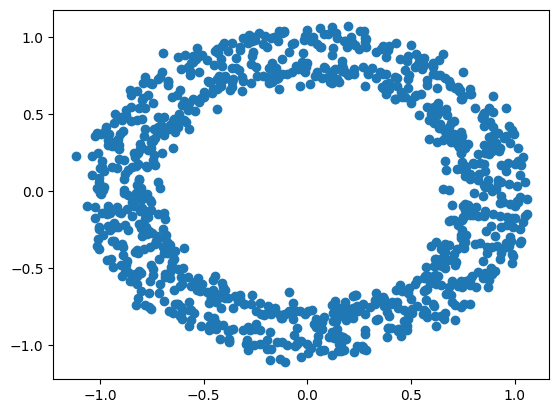

In [ ]:
plt.scatter(x=x[:,0],
            y=x[:,1],
            cmap = plt.cm.RdYlBu)

In [ ]:
from sklearn.model_selection import train_test_split
#Converting from numpy.ndarray to torch.Tensor
x = torch.from_numpy(x).type(torch.float32)
y = torch.from_numpy(y).type(torch.float32)
print(x[0:5,:],y[:5])

tensor([[ 0.7422,  0.2467],
        [-0.7340,  0.1687],
        [-0.8299,  0.2220],
        [-0.4291,  0.6722],
        [ 0.4456, -0.8949]]) tensor([1., 1., 1., 1., 0.])


In [ ]:
train_x,val_x,train_y,val_y = train_test_split(x,y,test_size =0.2,random_state=42 )
print(len(train_x),len(train_y),"\n",len(val_x),len(val_y))

800 800 
 200 200


In [ ]:
import torch.nn.functional as f
import torch.nn as nn

class model_2(nn.Module):
  def __init__(self,out_shape,in_shape,hidden):
    super(model_2,self).__init__()
    self.linear1=nn.Linear(in_shape,hidden[0])
    self.linear2 = nn.Linear(hidden[0],out_shape)
  def forward(self, x:torch.Tensor)-> torch.Tensor:
    # x = f.relu(self.linear1(x))
    # out = f.sigmoid(self.linear2(x))
    x = self.linear1(x)
    out = self.linear2(x)
    return out

In [ ]:
device

'cuda:0'

In [ ]:
import torch.nn as nn

hidden = [5]
circle_model = model_2(1,2,hidden).to(device)
criteria = nn.BCELoss()
opt = torch.optim.Adam(circle_model.parameters(),lr=0.01)

In [ ]:
next(circle_model.parameters()).device

device(type='cuda', index=0)

In [ ]:
circle_model.state_dict()

OrderedDict([('linear1.weight',
              tensor([[ 0.3591, -0.4310],
                      [-0.7000, -0.2732],
                      [-0.5424,  0.5802],
                      [ 0.2037,  0.2929],
                      [ 0.2236, -0.0123]], device='cuda:0')),
             ('linear1.bias',
              tensor([ 0.5534, -0.5024,  0.0445, -0.4826,  0.2180], device='cuda:0')),
             ('linear2.weight',
              tensor([[-0.1540,  0.1370, -0.0932,  0.3709, -0.2651]], device='cuda:0')),
             ('linear2.bias', tensor([-0.2667], device='cuda:0'))])

In [ ]:
from tqdm.auto import tqdm
from sklearn.metrics import accuracy_score

def train_loop(n_epochs,criteria,model,opt,train_x,train_y,val_x,val_y):
  loss_train=[]
  loss_val=[]
  acc=[]

  for epoch in tqdm(range(n_epochs)):
    train_x, train_y = train_x.to(device), train_y.to(device)
    for x,y in zip(train_x,train_y):
      model.train()
      opt.zero_grad()
      yhat = model(x)
      l = criteria(yhat,y)
      l.backward()
      opt.step()
      loss_train.append(l)

    if epoch%20==0:
      model.eval()
      val_x,val_y = val_x.to(device),val_y.to(device)
      with torch.inference_mode():
        for x,y in zip(val_x,val_y):
          preds = model(x)
          l_val = criteria(preds,y)
          loss_val.append(l_val)
          acc_sample = accuracy_score(preds,y)
      acc.append(acc_sample)

  return {'Loss train':loss_train, 'Loss validation':loss_val, 'Accuracy validation':acc}

In [ ]:
n_epochs=500
train_loss, val_loss, acc = train_loop(n_epochs,criteria,circle_model,opt,train_x,train_y,val_x,val_y)
print(f"The first 5 epochs loss during training: {train_loss[:5]}\nValidation loss recorded every 20 epochs: {val_loss[:5]}\nAccuracy on validation set: {acc}")

**Day - 5**